# FT Headlines

Wordclouds from ~1000 recent FT headlines

### Import libraries

In [1]:
from collections import Counter  # word frequency
import re  # regular expressions
from nltk.corpus import stopwords  # uninteresting words
from wordcloud import WordCloud  # wordclouds
import matplotlib.pyplot as plt  # display visualisations

### Source the data

In [2]:
# Create a holder
headlines = []

# Read each line from the file into the holder
with open("headlines.txt", "r") as file:
    for line in file.readlines():
        headlines.append(line)

In [3]:
# Join all the text into a single string

raw_text = "".join(headlines)

### Clean the data

In [4]:
# Convert the text to lowercase

raw_text = raw_text.lower()

In [5]:
# Remove punctuation

raw_text = re.sub(r"[^\w\s]", " ", raw_text)

# Remove numbers and ft-specific words

raw_text = re.sub(r"\d|firstft| ft |bn", " ", raw_text)

# Replace all whitespace with single spaces

raw_text = re.sub("\s+", " ", raw_text)

### Prepare the data

In [6]:
# Split the text into separate words

tokens = raw_text.split(" ")

In [7]:
# Remove words that don't help analysis

stops = stopwords.words("english")

tokens = [word for word in tokens if word not in stops]

In [8]:
# Count word frequencies

count = Counter(tokens)

### Generate a wordcloud

In [9]:
# Make a word:frequency dict

wc_dict = dict(count)

In [10]:
# Generate a wordcloud

cloud = WordCloud(width=800, height=300, max_words=150)

cloud.generate_from_frequencies(wc_dict)

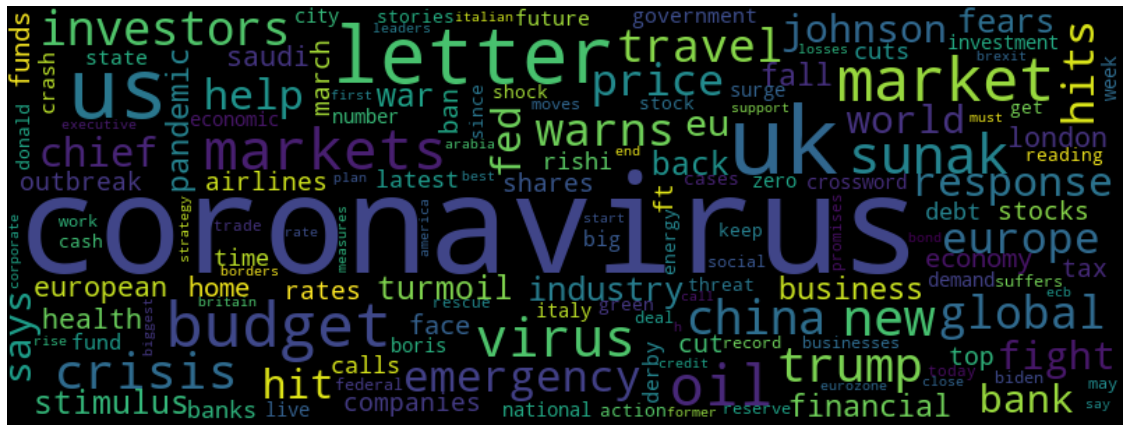

In [11]:
# Set the visualisation size

plt.figure(figsize=(20, 10))

# Display the cloud

plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Extension: shape the cloud

In [12]:
from PIL import Image  # Load images from files
import numpy as np  # Convert images to numbers

In [13]:
# Create the mask

mask = np.array(Image.open("sterling.jpeg"))

In [14]:
# Generate the masked wordcloud

cloud = WordCloud(width=800, height=300, max_words=100, mask=mask)

cloud.generate_from_frequencies(wc_dict)

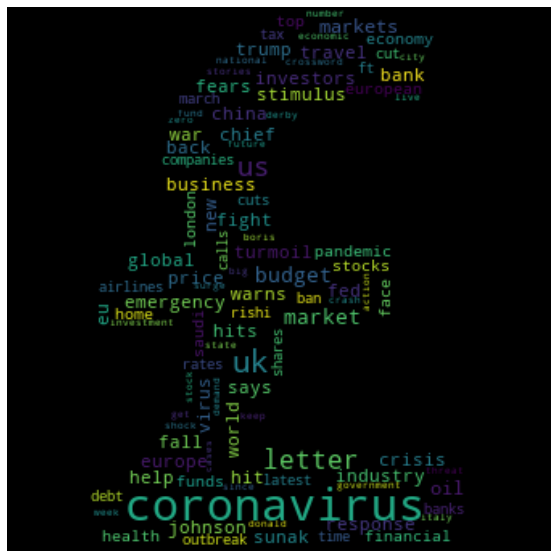

In [15]:
# Set the visualisation size

plt.figure(figsize=(20, 10))

# Display the cloud

plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Extension: colour the cloud

In [16]:
def colour(*args, **kwargs):
    return "#0D7680"
                
cloud = WordCloud(width=800, height=300, mask=mask, max_words=100,
                  background_color="#F2DFCE", color_func=colour)

cloud.generate_from_frequencies(wc_dict)

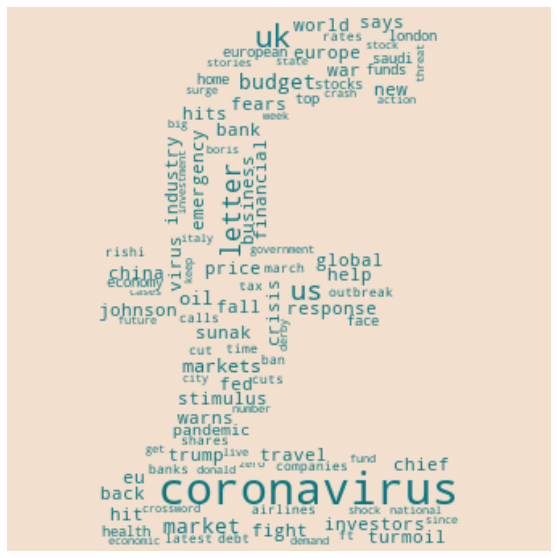

In [17]:
# Display the cloud

plt.figure(figsize=(20, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()